In [1]:
import sys

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from glob import glob
%matplotlib inline

In [3]:
from pathlib import Path

In [4]:
base = Path('/home/jovyan/AOI/data/')
data1_path = base / '20180703'
data1_label_path = data1_path / 'label'
data2_path = base / '20180705'
data2_label_path = data1_path / 'label'
data3_path = base / '20180726_S1'

In [5]:
xml_df = pd.read_pickle('all_xml_df.p')
data_table = pd.read_pickle('all_finalcsv.p')

In [8]:
xml_df[['image_size_height', 'image_size_width']].describe()

,image_size_height,image_size_width
count,10425.0,10425.0
mean,2048.0,1536.0
std,0.0,0.0
min,2048.0,1536.0
25%,2048.0,1536.0
50%,2048.0,1536.0
75%,2048.0,1536.0
max,2048.0,1536.0


# final.csv 

In [6]:
data_table['cModel'].nunique(), data_table['BoardSN'].nunique()

(9, 633)

# collect failed case files and grouped according to their defect types

In [16]:
wrong_color_files = ['20180705/final/fail/S02_115_001241.jpg', 
                     '20180705/final/fail/S02_115_001635.jpg',
                     '20180705/final/fail/S02_116_002679.jpg',
                     '20180705/final/fail/S02_207_000897.jpg', 
                     '20180705/final/fail/S02_207_001250.jpg', 
                     '20180705/final/fail/S02_207_001645.jpg', 
                     '20180726_S1/final/fail/C02_115_000167.jpg']
wrong_color_files = ['/home/jovyan/AOI/data/'+x for x in wrong_color_files]

In [30]:
files_dict = {}
for r in data_table['op_defect_name'].unique():
    index = (data_table['label']==0) & (data_table['op_defect_name'] == r)
    if np.sum(index) > 0:
        files_dict[r] = data_table[index].index

In [35]:
import shutil


In [36]:
files_dict['C02'][0].split('/')[-1]

'/home/jovyan/AOI/data/20180703/final/fail/C02_204_001109.jpg'

In [37]:
for k in files_dict.keys():
    os.makedirs(k)
    for i,f in enumerate(files_dict[k]):
        shutil.copy(f, f"./{k}/{i:03}_{f.split('/')[-1]}")
        f2 = f.replace('.jpg','.xml')
        shutil.copy(f2, f"./{k}/{i:03}_{f2.split('/')[-1]}")



In [44]:
index = (data_table['label']==1) & (data_table['op_defect_name'] == r)
files = data_table[index].index.tolist()
np.random.shuffle(files)


In [50]:
os.mkdir('passed')
files_passed_dict = {}
for k in files_dict.keys():
    os.mkdir(f'passed/{k}')
    index = (data_table['label']==1) & (data_table['op_defect_name'] == k)
    if np.sum(index) > 0:
        files = data_table[index].index.tolist()
        np.random.shuffle(files)
        files_passed_dict[k] = files[:550]
    if (k in files_passed_dict):
        for i,f in enumerate(files_passed_dict[k]):
            shutil.copy(f, f"./passed/{k}/{i:03}_{f.split('/')[-1]}")
            f2 = f.replace('.jpg','.xml')
            shutil.copy(f2, f"./passed/{k}/{i:03}_{f2.split('/')[-1]}")  
    else:
        print(k, ' no passed')

C01  no passed


# 每個Model有多少張圖

In [10]:
data_table.groupby('cModel')['BoardSN'].count()

cModel
S08AP2VFN018A-B     746
S08AP2VFN025A-B    2540
S08AP2VFN027A-T    2110
S0P084627021A-B    1615
S0P084651016A-B     200
S0P084651016A-T    1258
S0PEC4654004Z-T    1023
S0S084627002A-B      64
SP2ZZ6632003A-T     865
Name: BoardSN, dtype: int64

# 每個cModel不同CompName有多少張圖

In [6]:
count_comp_model_df = data_table.groupby(['cModel', 'CompName'])[['Type']].count()
count_comp_model_df.rename({"Type":'cModel-CompName count'}, axis=1,inplace=True)
count_comp_model_df.sort_values('cModel-CompName count',ascending=False).head(10)

cModel-CompName count
cModel          CompName                       
S08AP2VFN025A-B U35_2                       352
                U36_2                       340
                U35_1                       210
                Q22_2                       176
                U36_1                       149
S08AP2VFN027A-T U63_2                       128
                U63_1                       123
                U23_2                       105
                U23_1                       103
S08AP2VFN018A-B U36_2                       100

In [7]:
n=5
print(f"超過{n}張同一cModel,同一part照片比例: {np.mean(count_comp_model_df['cModel-CompName count'] > n)*100:02.2f}%")
count_comp_model_df.describe(percentiles=[0.5,0.6,0.7,0.8,0.9,0.95,0.99])

超過5張同一cModel,同一part照片比例: 23.37%


,cModel-CompName count
count,1399.000000
mean,7.448892
std,19.912974
min,1.000000
50%,2.000000
60%,3.000000
70%,4.000000
80%,6.400000
90%,17.000000
95%,32.000000


# 每個Model不同new_part_type有多少張圖

In [8]:
count_comp2_model_df = data_table.groupby(['cModel', 'new_part_type'])[['Type']].count()
count_comp2_model_df.rename({"Type":'Model-part count'}, axis=1,inplace=True)
count_comp2_model_df.sort_values('Model-part count',ascending=False).head(10)

Model-part count
cModel          new_part_type                  
S0PEC4654004Z-T 115                         866
S0P084627021A-B 115                         842
S08AP2VFN025A-B 204                         662
                116                         567
                207                         489
S08AP2VFN027A-T 111                         416
S08AP2VFN025A-B 200                         400
S0P084651016A-T 115                         391
S08AP2VFN025A-B 115                         377
S08AP2VFN027A-T 102                         323

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


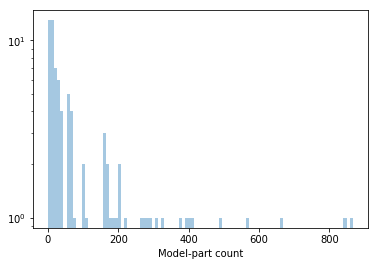

In [46]:
ax = sns.distplot(count_comp2_model_df['Model-part count'], bins=100,kde=False,)
ax.set_yscale('log')


In [47]:
n=5
print(f"超過{n}張同一cModel,同一part照片比例: {np.mean(count_comp_model_df['Model-part count'] > n)*100:02.2f}%")
count_comp2_model_df.describe(percentiles=[0.5,0.6,0.7,0.8,0.9,0.95,0.99])

超過5張同一cModel,同一parte照片比例: 87.80%


,Model-part count
count,82.000000
mean,127.085366
std,183.572517
min,1.000000
50%,38.500000
60%,66.600000
70%,157.700000
80%,208.000000
90%,371.600000
95%,485.350000


## failed case 

In [48]:
failed_indx = data_table['label'] == 0
failed_df = data_table.loc[failed_indx, ['cModel', 'CompName']]

In [51]:
total_images = []
passed_images = []
for r in failed_df.iterrows():
    total_images.append((
        np.sum((data_table.cModel == r[1].cModel) & 
               (data_table.CompName == r[1].CompName))))
    passed_images.append((
                np.sum((data_table.cModel == r[1].cModel) & 
               (data_table.CompName == r[1].CompName) & 
               (data_table.label == 1))))

In [52]:
failed_df['total_images_cnt'] = total_images
failed_df['passed_image_cnt'] = passed_images 
failed_df['failed_image_cnt'] = failed_df['total_images_cnt'] - failed_df['passed_image_cnt']

In [53]:
failed_df.sort_values('total_images_cnt',ascending=False).head()

,cModel,CompName,total_images_cnt,passed_image_cnt,failed_image_cnt
image_filename,,,,,
/home/jovyan/AOI/data/20180705/final/fail/S02_116_002681.jpg,S08AP2VFN025A-B,U35_1,210,208,2
/home/jovyan/AOI/data/20180705/final/fail/S02_116_002679.jpg,S08AP2VFN025A-B,U35_1,210,208,2
/home/jovyan/AOI/data/20180705/final/fail/S02_207_001250.jpg,S08AP2VFN025A-B,U36_1,149,142,7
/home/jovyan/AOI/data/20180705/final/fail/S02_207_001645.jpg,S08AP2VFN025A-B,U36_1,149,142,7
/home/jovyan/AOI/data/20180705/final/fail/S02_207_000896.jpg,S08AP2VFN025A-B,U36_1,149,142,7


,total_images_cnt,passed_image_cnt,failed_image_cnt
count,566.000000,566.000000,566.000000
mean,7.503534,4.312721,3.190813
std,21.891749,21.559945,1.003879
min,1.000000,0.000000,1.000000
25%,3.000000,0.000000,3.000000
50%,3.000000,0.000000,3.000000
75%,4.000000,0.000000,3.000000
90%,7.000000,2.000000,4.000000
95%,19.000000,16.000000,4.000000
99%,149.000000,142.000000,8.000000


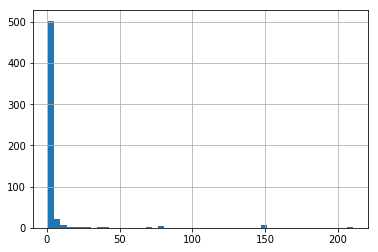

In [55]:
failed_df['total_images_cnt'].hist(bins=50)
failed_df.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

## new_sub_part 是廢物 丟掉 全是NaN

In [7]:
data_table['new_sub_part'].unique()

array([ nan])

## new_location + new_part == compName?

In [ ]:
data_table.groupby(['cModel', ''])

# ~~jpg_name could be NaN~~ 20180705/final.csv only has newfile column

In [9]:
print(f"about 50% of jpg_name is missing: {np.sum(data_table['jpg_name'].isnull())}")
print(data_table.groupby(['path','label'])['jpg_name'].apply(lambda x: np.mean(x.isnull())))
print('all right all 20180705 has no jpg_name')


about 50% of jpg_name is missing: 0
path         label
20180703     0        0.0
             1        0.0
20180705     0        0.0
             1        0.0
20180726_S1  0        0.0
             1        0.0
Name: jpg_name, dtype: float64
all right all 20180705 has no jpg_name


# defect type

In [10]:
print(f"unique AOI detected defect: {data_table['MachineDefect'].unique()}")


unique AOI detected defect: ['VOID FAIL' 'S02' 'C11' 'C02' 'C04' 'C03' 'ROTATE' 'S01' 'C13' 'LEAD_FAIL'
 'C08' 'MARKING' 'C09']


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Using 'rename_axis' to alter labels is deprecated. Use '.rename' instead
  
/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


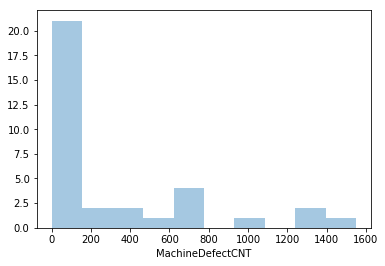

In [11]:
count_aoi_detect_df = data_table.groupby(['path', 'MachineDefect'])[['label']].count()
count_aoi_detect_df.rename_axis({'label':'MachineDefectCNT'},axis=1,inplace=True)
sns.distplot(count_aoi_detect_df['MachineDefectCNT'], kde=False,bins=10)

In [12]:
df = count_aoi_detect_df.reset_index()
df.pivot_table(values='MachineDefectCNT', index='MachineDefect',columns='path')


path,20180703,20180705,20180726_S1
MachineDefect,,,
C02,42.0,1551.0,990.0
C03,484.0,1280.0,636.0
C04,25.0,130.0,30.0
C08,NaN,50.0,43.0
C09,NaN,NaN,435.0
C11,315.0,22.0,87.0
C13,1.0,11.0,NaN
LEAD_FAIL,2.0,246.0,28.0
MARKING,NaN,232.0,24.0


unique AOI detected defect: [nan 'C02' 'C01' 'C08' 'C03' 'S02' 'C14' 'S01']


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Using 'rename_axis' to alter labels is deprecated. Use '.rename' instead
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


path,20180703,20180705,20180726
ConfirmDefect,,,
C01,1.0,NaN,NaN
C02,3.0,NaN,4.0
C03,NaN,1.0,NaN
C08,2.0,8.0,3.0
C14,NaN,1.0,NaN
S01,NaN,NaN,1.0
S02,NaN,2.0,2.0


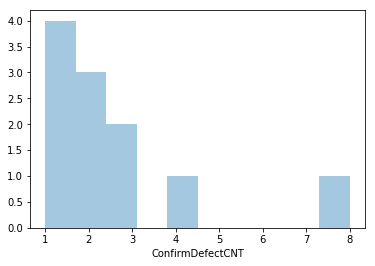

In [56]:
print(f"unique AOI detected defect: {data_table['ConfirmDefect'].unique()}")
count_confirmed_df = data_table.groupby(['path', 'ConfirmDefect'])[['index']].count()
count_confirmed_df.rename_axis({'index':'ConfirmDefectCNT'},axis=1,inplace=True)
sns.distplot(count_confirmed_df['ConfirmDefectCNT'], kde=False,bins=10)
df = count_confirmed_df.reset_index()
df.pivot_table(values='ConfirmDefectCNT', index='ConfirmDefect',columns='path')

## 用xml裡的標記來看有多少failed defect type

In [20]:

xml_df[xml_df['subfolder']=='fail'].groupby(['path', 'subfolder', 'op_defect_name'])['pose'].count()

path         subfolder  op_defect_name
20180703     fail       C01                 2
20180705     fail       C02               224
                        C08                 7
                        C13                 1
20180726_S1  fail       C01                 1
                        C02                 1
                        C08                 4
                        S07                 1
Name: pose, dtype: int64

In [21]:
d = xml_df[xml_df['label'] == 'fail'].groupby(['path', 'label', 'op_defect_name'])[['pose']].count()
print(547/d['pose'].sum())
d.rename(columns={'pose':'count'})

0.966431095406


count
path        label op_defect_name       
20180703    fail  C01                 2
                  C02                 2
                  S07                 1
20180705    fail  C02               547
                  C08                 7
                  C13                 1
20180726_S1 fail  C01                 1
                  C02                 1
                  C08                 4

In [51]:
xml_df[(xml_df['subfolder'] == 'fail') & (xml_df['path'] == '20180703')]

,image_size_depth,image_size_height,image_size_width,op_defect_name,pose,subfolder,xmax,xmin,ymax,ymin,path
/home/jovyan/AOI/data/20180703/final/fail/C02_200_001988.xml,3.0,2048.0,1536.0,C01,Unspecified,fail,866,757,866,591,20180703
/home/jovyan/AOI/data/20180703/final/fail/C04_200_001942.xml,3.0,2048.0,1536.0,C01,Unspecified,fail,866,761,866,519,20180703


## 在pass or fail資料夾要用label來看

In [58]:
data_table['index'] = np.arange(data_table.shape[0]) 
data_table.groupby(['path','label'])['index'].count()


path      label
20180703  0           5
          1        1018
20180705  0         551
          1        5028
20180726  0           7
          1        3812
Name: index, dtype: int64

# xml裡op確認fail的有多少張重複的位置跟cmodel

In [12]:
data_table

,image_size_depth,image_size_height,image_size_width,op_defect_name,pose,subfolder,xmax,xmin,ymax,ymin
/home/jovyan/AOI/data/20180726_S1/final/fail/C02_115_000167.xml,3.0,2048.0,1536.0,C08,Unspecified,fail,905,655,905,1282
/home/jovyan/AOI/data/20180726_S1/final/fail/C02_115_000168.xml,3.0,2048.0,1536.0,C08,Unspecified,fail,276,197,276,1335
/home/jovyan/AOI/data/20180726_S1/final/fail/C02_200_031750.xml,3.0,2048.0,1536.0,C08,Unspecified,fail,702,600,702,1501
/home/jovyan/AOI/data/20180726_S1/final/fail/C02_204_003678.xml,3.0,2048.0,1536.0,C08,Unspecified,fail,648,605,648,1427
/home/jovyan/AOI/data/20180726_S1/final/fail/S07_200_031400.xml,3.0,2048.0,1536.0,C02,Unspecified,fail,702,600,702,1494


In [13]:

# data_table['image_filename'] = [Path(f) for f in data_table['image_filename']]

In [14]:
data_table.loc[0, ['image_filename', 'jpg_name', 'path','label', 'cModel','CompName']]

,image_filename,jpg_name,path,label,cModel,CompName
0,/home/jovyan/AOI/data/20180703/final/pass/S07_...,S07_204_000004.jpg,20180703,1,S0PEC4654004Z-T,C227_1
0,/home/jovyan/AOI/data/20180705/final/pass/C03_...,C03_115_000001.jpg,20180705,1,S08AP2VFN025A-B,Q22_1
0,/home/jovyan/AOI/data/20180726_S1/final/pass/S...,S07_102_000005.jpg,20180726_S1,1,S0P084651016A-T,L9_1


In [39]:
len(file_exist), data_table.shape, xml_df.shape

(10421, (10421, 20), (10425, 12))

1.0

In [9]:
data_table[['cModel', 'CompName', 'Type', 
            'new_part_type', 'new_location',
            'jpg_dir','jpg_name','path']].sort_values(['path', 'cModel','jpg_name']).head(25)

,cModel,CompName,Type,new_part_type,new_location,jpg_dir,jpg_name,path
150,S0PEC4654004Z-T,L6_1,102000000213A,102,L,t_001,C02_102_000316.jpg,20180703
243,S0PEC4654004Z-T,L6_1,102000000213A,102,L,t_001,C02_102_000494.jpg,20180703
332,S0PEC4654004Z-T,L2_1,102000000169A,102,L,t_001,C02_102_000663.jpg,20180703
769,S0PEC4654004Z-T,L31_1,102000000169A,102,L,t_001,C02_102_001523.jpg,20180703
85,S0PEC4654004Z-T,TO2_1,115000000048A,115,TO,t_001,C02_115_000192.jpg,20180703
86,S0PEC4654004Z-T,TO2_1,115000000048A,115,TO,t_001,C02_115_000193.jpg,20180703
771,S0PEC4654004Z-T,TO2_1,115000000048A,115,TO,t_001,C02_115_001526.jpg,20180703
772,S0PEC4654004Z-T,TO2_1,115000000048A,115,TO,t_001,C02_115_001527.jpg,20180703
1016,S0PEC4654004Z-T,D2_1,115000000101A,115,D,t_001,C02_115_001983.jpg,20180703
35,S0PEC4654004Z-T,CONN3_1,118200000097A,118,CONN,t_001,C02_118_000092.jpg,20180703
